In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [51]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("hessi.solar.flare.2002to2016.csv", parse_dates=["start.date"],
                          dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
solar_flare.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [52]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')

In [53]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

0        2002-02-12 21:33:38
1        2002-02-12 21:45:06
2        2002-02-13 00:54:54
3        2002-02-13 04:23:50
4        2002-02-13 07:05:14
                 ...        
113937   2016-12-26 22:17:02
113938   2016-12-26 23:28:18
113939   2016-12-27 08:39:06
113940   2016-12-27 12:21:30
113941   2016-12-27 12:37:14
Name: start_datetime, Length: 113942, dtype: datetime64[ns]

In [54]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [55]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


In [56]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113942 entries, 2002-02-12 21:33:38 to 2016-12-27 12:37:14
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             113942 non-null  int64   
 1   duration.s        113942 non-null  int64   
 2   peak.c/s          113942 non-null  int64   
 3   total.counts      113942 non-null  float64 
 4   energy.kev        113942 non-null  category
 5   x.pos.asec        113942 non-null  int64   
 6   y.pos.asec        113942 non-null  int64   
 7   radial            113942 non-null  int64   
 8   active.region.ar  113942 non-null  category
 9   flag.1            113942 non-null  object  
 10  flag.2            113942 non-null  object  
 11  flag.3            94035 non-null   object  
 12  flag.4            93740 non-null   object  
 13  flag.5            52991 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.7

In [57]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000


In [58]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

13111352    2
13111351    2
3042103     2
Name: flare, dtype: int64
Number of duplicates in the 'flare' column: 3


In [59]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  113942
Length of dataframe after dropping duplicates:  113939


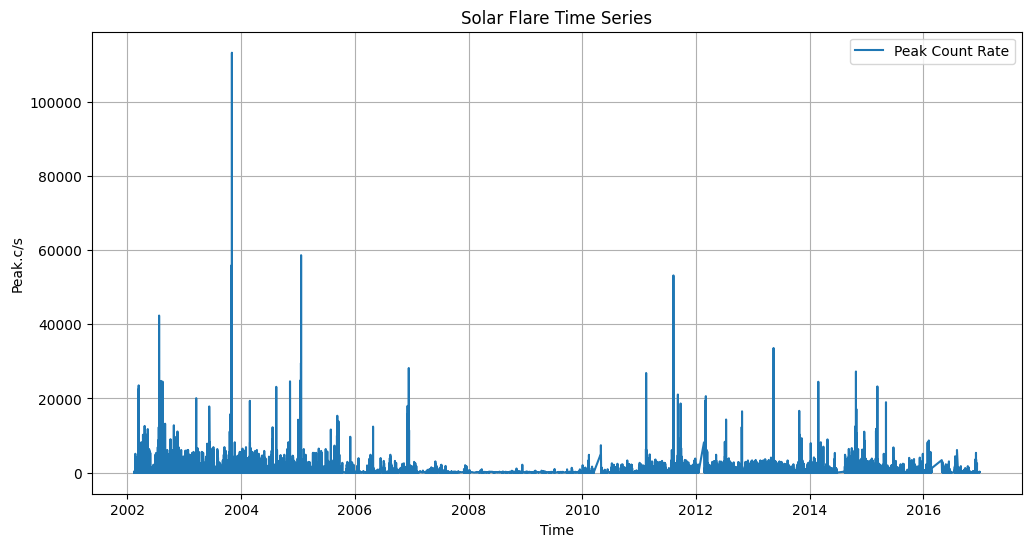

In [60]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['peak.c/s'], label='Peak Count Rate')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Peak.c/s')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
solar_flare = solar_flare.iloc[:, :9]
solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar
start_datetime,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825
...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0


**Correlation Analysis:**
Compute the correlation matrix to identify pairwise correlations between variables.
High correlations (close to 1 or -1) between pairs of input features may indicate multicollinearity.

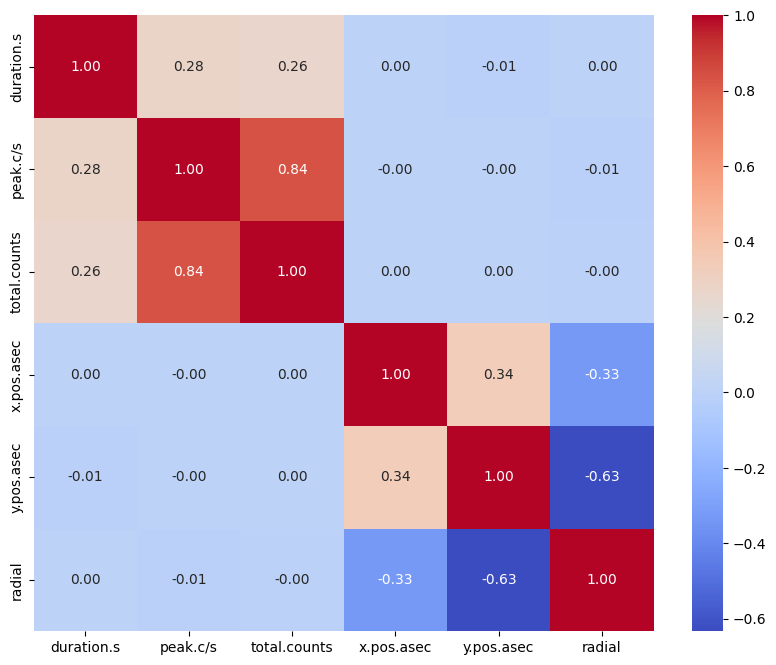

In [62]:
import pandas as pd

# Assuming df is your DataFrame with the mentioned variables
correlation_matrix = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**VIF (Variance Inflation Factor):**
Calculate the Variance Inflation Factor for each variable to quantify multicollinearity.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the variables of interest
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]

# Add a constant for the intercept term
X['intercept'] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Find the variable with the highest VIF
variable_with_highest_vif = vif_data.loc[vif_data['VIF'].idxmax()]

# Display the variable with the highest VIF
print("Variable with the highest VIF:")
print(variable_with_highest_vif)


       Variable       VIF
0    duration.s  1.086169
1      peak.c/s  3.432127
2  total.counts  3.404821
3    x.pos.asec  1.158818
4    y.pos.asec  1.721463
5        radial  1.717288
6     intercept  5.202871
Variable with the highest VIF:
Variable    intercept
VIF          5.202871
Name: 6, dtype: object


Typically, a VIF value below 5 is considered acceptable, indicating low multicollinearity. None of your features have VIF values significantly exceeding this threshold, suggesting that multicollinearity is not a severe issue.

If you still want to reduce multicollinearity further, you might consider removing the feature with the highest VIF among the actual features (excluding the intercept term). In this case, the total.counts feature has the highest VIF (3.281116), but this value is not extremely high.

You could choose to keep all features, or if you prefer to be conservative in addressing multicollinearity, you might consider removing the feature with the highest VIF, which is total.counts.

**Feature Selection:**
Use techniques like Recursive Feature Elimination (RFE) or feature importance from tree-based models to select the most important features.

In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming y is your target variable
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]
y = solar_flare['energy.kev']

# Use RandomForestRegressor for feature selection
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

# Display the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['duration.s', 'peak.c/s', 'total.counts', 'radial'], dtype='object')


# Peak c/s - Target variable 1

In [65]:
results=[]

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

target_feature = 'peak.c/s'

# Extract the target time series data
target_data = solar_flare[target_feature].values

# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences and corresponding target values
look_back = 10  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(target_data) - look_back):
    X.append(target_data[i:i + look_back])
    y.append(target_data[i + look_back])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [67]:
LSTM_model=load_model('FLARES1.h5')

In [68]:
test_predictions = LSTM_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

713/713 [==============================] - 2s 3ms/step


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 200.41
Mean Squared Error (MSE): 53944.86
Root Mean Squared Error (RMSE): 232.26
R-squared (R²): -1657170231.01


In [70]:
target_feature = 'peak.c/s'

# Extract the target time series data
target_data = solar_flare[target_feature].values

# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences and corresponding target values
look_back = 10  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(target_data) - look_back):
    X.append(target_data[i:i + look_back])
    y.append(target_data[i + look_back])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [71]:
GRU_model=load_model('GRUFLARES1.h5')

In [72]:
test_predictions = GRU_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

713/713 [==============================] - 2s 2ms/step


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 281.37
Mean Squared Error (MSE): 99527.04
Root Mean Squared Error (RMSE): 315.48
R-squared (R²): -3057441133.11


## energy.kev - Target variable 2

In [74]:
model_name="LSTM 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

In [75]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


LSTME_model=load_model('FLARES2.h5')

# Evaluate the model
test_loss, test_accuracy = LSTME_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.5052518  -0.09151858 -0.06833073  0.00481224]
 [-0.4731335  -0.24623813 -0.11971135  0.0087093 ]
 [-0.6392744  -0.23664312 -0.11907837 -0.39463705]
 ...
 [-0.2331522  -0.15868366 -0.11227451 -1.3435726 ]
 [ 0.06220942 -0.22584873 -0.11716121 -0.4452989 ]
 [-0.6761946  -0.1970637  -0.11920601  0.19771701]]
713/713 [==============================] - 2s 2ms/step - loss: 0.8434 - accuracy: 0.7276
Test Accuracy: 72.76%


In [76]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [77]:
model_name="GRU 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

In [78]:
# prompt: build a GRU model for the same
from keras.models import Sequential
from keras.layers import GRU, Dense

categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

GRUE_model=load_model('GRUFLARES2.h5')



[[ 0.5052518  -0.09151858 -0.06833073  0.00481224]
 [-0.4731335  -0.24623813 -0.11971135  0.0087093 ]
 [-0.6392744  -0.23664312 -0.11907837 -0.39463705]
 ...
 [-0.2331522  -0.15868366 -0.11227451 -1.3435726 ]
 [ 0.06220942 -0.22584873 -0.11716121 -0.4452989 ]
 [-0.6761946  -0.1970637  -0.11920601  0.19771701]]


In [79]:
test_loss, test_accuracy = GRUE_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



713/713 [==============================] - 2s 2ms/step - loss: 1.2921 - accuracy: 0.7143
Test Accuracy: 71.43%


In [80]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Test it on solar data 2017-2018

In [81]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("hessi.solar.flare.UP_To_2018.csv", parse_dates=["start.date"],
                          dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
solar_flare.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [82]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')

In [83]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

0        2002-02-12 21:33:38
1        2002-02-12 21:45:06
2        2002-02-13 00:54:54
3        2002-02-13 04:23:50
4        2002-02-13 07:05:14
                 ...        
116138   2018-02-09 16:42:54
116139   2018-02-09 18:17:26
116140   2018-02-10 13:06:46
116141   2018-02-26 15:51:18
116142   2018-03-03 04:06:22
Name: start_datetime, Length: 116143, dtype: datetime64[ns]

In [84]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [85]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 16:42:54,18020903,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09 18:17:26,18020904,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10 13:06:46,18021001,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


In [86]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116143 entries, 2002-02-12 21:33:38 to 2018-03-03 04:06:22
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             116143 non-null  int64   
 1   duration.s        116143 non-null  int64   
 2   peak.c/s          116143 non-null  int64   
 3   total.counts      116143 non-null  float64 
 4   energy.kev        116143 non-null  category
 5   x.pos.asec        116143 non-null  int64   
 6   y.pos.asec        116143 non-null  int64   
 7   radial            116143 non-null  int64   
 8   active.region.ar  116143 non-null  category
 9   flag.1            116143 non-null  object  
 10  flag.2            116143 non-null  object  
 11  flag.3            96236 non-null   object  
 12  flag.4            95941 non-null   object  
 13  flag.5            54963 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.9

In [87]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.161430e+05,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000
mean,1.099563e+07,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989
std,9.888161e+06,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.112632e+06,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000
50%,1.112297e+07,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000
75%,1.404222e+07,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000
max,1.711151e+08,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000


In [88]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

13111352    2
13111351    2
3042103     2
Name: flare, dtype: int64
Number of duplicates in the 'flare' column: 3


In [89]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  116143
Length of dataframe after dropping duplicates:  116140


In [90]:
# Filter data for the years 2017 and 2018
# solar_flare[solar_flare.index.year == year_to_extract]
new_solar_flare = solar_flare[(solar_flare.index.year == 2017) | (solar_flare.index.year == 2018)]

In [91]:
new_solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2017-01-10 13:21:34,17011014,296,26,11561.0,6-12,883,268,923,0,A0,P1,PE,Q1,NaN
2017-01-10 15:13:34,17011001,268,232,67456.0,6-12,928,262,965,0,A0,P1,PE,Q2,SE
2017-01-10 16:45:46,17011004,724,720,340656.0,6-12,283,65,291,0,A0,P1,PE,Q1,NaN
2017-01-10 17:09:06,17011011,136,64,7104.0,6-12,918,270,957,0,A0,P1,PE,Q1,NaN
2017-01-10 18:07:14,17011005,604,720,239760.0,12-25,923,285,966,0,A0,DR,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 16:42:54,18020903,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09 18:17:26,18020904,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10 13:06:46,18021001,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


In [92]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_Ltest_loss, new_Ltest_accuracy = LSTME_model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_Ltest_accuracy * 100:.2f}%')
# new_Gtest_loss, new_Gtest_accuracy = GRUEmodel.evaluate(new_X_sequences, new_y_sequences)
# print(f'New Test Accuracy: {new_Gtest_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 4ms/step - loss: 1.0737 - accuracy: 0.7052
New Test Accuracy: 70.52%


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = LSTME_model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 1s 3ms/step
Precision: 59.79%
Recall: 70.52%
F1 Score: 61.95%


# LSTM + GRU

In [94]:
model_name="LSTM + GRU 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

In [95]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


LSGR_model=load_model('FLARES3.h5')

# Evaluate the model
test_loss, test_accuracy = LSGR_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[ 0.5030246  -0.09420199 -0.06872918  0.00802093]
 [-0.47368634 -0.24788813 -0.1204874   0.01193201]
 [-0.6395429  -0.2383572  -0.11984977 -0.3928647 ]
 ...
 [-0.7961852  -0.2383572  -0.12287523 -1.1085923 ]
 [-0.59347165 -0.23716584 -0.12251837 -0.9091271 ]
 [-0.00375941 -0.20619035 -0.11841707  0.48321703]]
726/726 [==============================] - 3s 3ms/step - loss: 0.8782 - accuracy: 0.7186
Test Accuracy: 71.86%


In [96]:
# LSGR_model.save('FLARES3.h5')

In [97]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [98]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '72.76%'],
 ['GRU 2002-2016', 10, 0.0, 100, 64, '71.43%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.86%']]

# Test it on solar data 2017-2018

In [99]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = LSGR_model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 3ms/step - loss: 1.0469 - accuracy: 0.7065
New Test Accuracy: 70.65%


In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = LSGR_model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 1s 3ms/step
Precision: 60.99%
Recall: 70.65%
F1 Score: 62.26%



# LSTM + GRU 2012

In [103]:
# Extract data for the year 2012
year_to_extract = 2012
solar_flare_for_2012 =  solar_flare[solar_flare.index.year == year_to_extract]

solar_flare_for_2012

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2012-01-01 01:57:42,12010101,204,100,47480.0,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
2012-01-01 02:24:54,12010102,260,42,34120.0,6-12,948,182,965,1384,A0,DR,P1,PE,Q2
2012-01-01 03:52:30,12010104,2104,336,782640.0,6-12,-540,-395,669,1389,A0,DR,P1,PE,Q2
2012-01-01 05:23:26,12010107,176,44,23160.0,6-12,966,167,981,1384,A0,P1,PE,Q1,NaN
2012-01-01 05:39:06,12010108,248,26,25680.0,6-12,-521,-397,655,1389,A0,DR,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 21:39:46,12123122,472,64,79152.0,6-12,-930,322,985,0,A0,P1,PE,Q1,NaN
2012-12-31 21:44:30,12123128,204,24,23328.0,6-12,-101,476,486,1640,A0,P1,PE,Q1,NaN
2012-12-31 21:49:02,12123126,400,24,39672.0,6-12,-99,465,475,1640,A0,P1,PE,Q1,NaN


In [104]:
model_name="LSTM + GRU 2012 with recurrent_dropout"
epochs=100
batch_size=64
recurrent_dropout=0.9

In [105]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare_for_2012['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare_for_2012['duration.s'])
data_peak = np.array(solar_flare_for_2012['peak.c/s'])
data_counts = np.array(solar_flare_for_2012['total.counts'])
data_radial = np.array(solar_flare_for_2012['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 5

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# # Create an LSTM and a GRU model in parallel
# input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
# lstm_layer = LSTM(50)(input_layer)
# gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# # Combine the LSTM and GRU outputs
# combined = concatenate([lstm_layer, gru_layer], axis=-1)

# output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

# LRGRmodel1 = Model(inputs=input_layer, outputs=output_layer)

# LRGRmodel1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LRGRmodel1= load_model("LRGRFLARE1.h5")

# # Implement learning rate scheduler
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# # Implement early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = LRGRmodel1.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# # Plot training history
# plt.figure(figsize=(12, 6))

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.tight_layout()
# plt.show()

# Evaluate the model
test_loss, test_accuracy = LRGRmodel1.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[-0.6707729  -0.13847892 -0.1619157  -2.444481  ]
 [-0.5342047  -0.23506333 -0.17023934  0.96252745]
 [ 3.96279     0.25451973  0.29610974 -0.08252381]
 ...
 [-0.1927843  -0.2650378  -0.1667803  -0.7674561 ]
 [ 0.04133258  1.0005511   0.2825327  -0.7039057 ]
 [ 1.2509364  -0.22840233 -0.1103489   1.0684448 ]]
72/72 [==============================] - 1s 3ms/step - loss: 0.5476 - accuracy: 0.8389
Test Accuracy: 83.89%


In [106]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [107]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '72.76%'],
 ['GRU 2002-2016', 10, 0.0, 100, 64, '71.43%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.86%'],
 ['LSTM + GRU 2012 with recurrent_dropout', 5, 0.9, 100, 64, '83.89%']]

# Test it on solar data 2017-2018

In [108]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = LRGRmodel1.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 2ms/step - loss: 1.2102 - accuracy: 0.5870
New Test Accuracy: 58.70%


In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = LRGRmodel1.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 1s 2ms/step
Precision: 54.04%
Recall: 58.70%
F1 Score: 45.69%


## LSTM + GRU 2016

In [110]:
# Extract data for the year 2016
year_to_extract = 2016
solar_flare_for_2016 =  solar_flare[solar_flare.index.year == year_to_extract]

solar_flare_for_2016

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2016-01-01 03:57:46,16010101,268,28,14964.0,6-12,854,-292,903,2473,A0,DF,DR,P1,PE Q3
2016-01-01 04:01:46,16010102,156,26,7980.0,6-12,855,-285,902,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:16:10,16010103,244,38,10200.0,6-12,828,-312,885,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:24:10,16010104,624,52,47100.0,6-12,794,-310,853,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:36:18,16010105,904,44,79212.0,6-12,899,-299,948,2473,A0,DF,DR,P1,PE Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


In [111]:
model_name="LSTM + GRU 2016 with recurrent_dropout"
epochs=100
batch_size=64
recurrent_dropout=0.9

In [112]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare_for_2016['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare_for_2016['duration.s'])
data_peak = np.array(solar_flare_for_2016['peak.c/s'])
data_counts = np.array(solar_flare_for_2016['total.counts'])
data_radial = np.array(solar_flare_for_2016['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 5

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# # Create an LSTM and a GRU model in parallel
# input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
# lstm_layer = LSTM(50)(input_layer)
# gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# # Combine the LSTM and GRU outputs
# combined = concatenate([lstm_layer, gru_layer], axis=-1)

# output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

# LRGRmodel2 = Model(inputs=input_layer, outputs=output_layer)

# LRGRmodel2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Implement learning rate scheduler
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# # Implement early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = LRGRmodel2.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# # Plot training history
# plt.figure(figsize=(12, 6))

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.tight_layout()
# plt.show()

LRGRmodel2= load_model("LRGRFLARE2.h5")

# Evaluate the model
test_loss, test_accuracy = LRGRmodel2.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[[-0.51585805 -0.34540248 -0.2881604  -0.08666818]
 [-0.7845769  -0.34871662 -0.29964396 -0.08704862]
 [-0.5734407  -0.32883173 -0.2959937  -0.09351614]
 ...
 [-0.21834794 -0.2592346  -0.25958306 -0.4302076 ]
 [ 0.08875929 -0.35203078 -0.2842602  -0.25482368]
 [-0.6790088  -0.312261   -0.2945862  -0.12927772]]
17/17 [==============================] - 1s 3ms/step - loss: 0.8056 - accuracy: 0.7954
Test Accuracy: 79.54%


In [113]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Test it on solar data 2017-2018

In [114]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = LRGRmodel2.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 2ms/step - loss: 1.2552 - accuracy: 0.5469
New Test Accuracy: 54.69%


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = LRGRmodel2.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 1s 4ms/step
Precision: 37.28%
Recall: 54.69%
F1 Score: 43.68%


# Display results

In [116]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '72.76%'],
 ['GRU 2002-2016', 10, 0.0, 100, 64, '71.43%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.86%'],
 ['LSTM + GRU 2012 with recurrent_dropout', 5, 0.9, 100, 64, '83.89%'],
 ['LSTM + GRU 2016 with recurrent_dropout', 5, 0.9, 100, 64, '79.54%']]

In [117]:
import pandas as pd

headers=['Model Name', 'Sequence length', 'recurrent_dropout', 'epochs', 'batch_size', 'Accuracy%']

# Create DataFrame
df = pd.DataFrame(results, columns=headers)

# Display the DataFrame
df

,Model Name,Sequence length,recurrent_dropout,epochs,batch_size,Accuracy%
0,LSTM 2002-2016,10,0.0,100,64,72.76%
1,GRU 2002-2016,10,0.0,100,64,71.43%
2,LSTM + GRU 2002-2016,10,0.0,100,64,71.86%
3,LSTM + GRU 2012 with recurrent_dropout,5,0.9,100,64,83.89%
4,LSTM + GRU 2016 with recurrent_dropout,5,0.9,100,64,79.54%


In [118]:
# Forecast would work in the same way where we provide the sequence and the output will be predicted by the model
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)  # To predict
    return forecast

In [119]:
solar_flare.head()

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [120]:
# Preparing the data
import pandas as pd
import datetime
# solar_flare = pd.read_csv("hessi.solar.flare.2002to2016.csv", parse_dates=["start.date"],
#                           dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
series = solar_flare['peak.c/s'].to_numpy()
# date = data['Date'].values
# date=np.array([datetime.datetime.strptime(x, '%Y-%m-%d') for x in date])
# time=np.array([x.month for x in date])

time= solar_flare.index
# Splitting the data into train and test
split_time = int(len(series)*0.9)          # 90% of the original data is for training
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:] #date
x_valid = series[split_time:] #monthly sunspot number
print(f"There are {len(x_train)} training samples and {len(x_valid)} validation samples.")

print(time_valid)

There are 104526 training samples and 11614 validation samples.
DatetimeIndex(['2015-03-10 20:41:22', '2015-03-10 20:54:18',
               '2015-03-10 21:05:54', '2015-03-10 21:24:50',
               '2015-03-10 21:31:50', '2015-03-10 22:17:38',
               '2015-03-10 22:31:38', '2015-03-10 22:40:50',
               '2015-03-10 22:48:18', '2015-03-10 23:10:34',
               ...
               '2018-02-08 17:00:14', '2018-02-08 18:44:38',
               '2018-02-08 19:53:54', '2018-02-09 14:55:22',
               '2018-02-09 15:46:54', '2018-02-09 16:42:54',
               '2018-02-09 18:17:26', '2018-02-10 13:06:46',
               '2018-02-26 15:51:18', '2018-03-03 04:06:22'],
              dtype='datetime64[ns]', name='start_datetime', length=11614, freq=None)


In [121]:
# Parameters
delta = 1                      # Huber loss
window_size = 10               # For dataset
batch_size = 145               # For dataset
shuffle_buffer_size= 900       # Shuffling the dataset randomly
epochs = 100                   # For optimal learning rate
train_epochs = epochs + 0    # Training epochs
momentum_sgd = 0.9

801/801 [==============================] - 11s 13ms/step


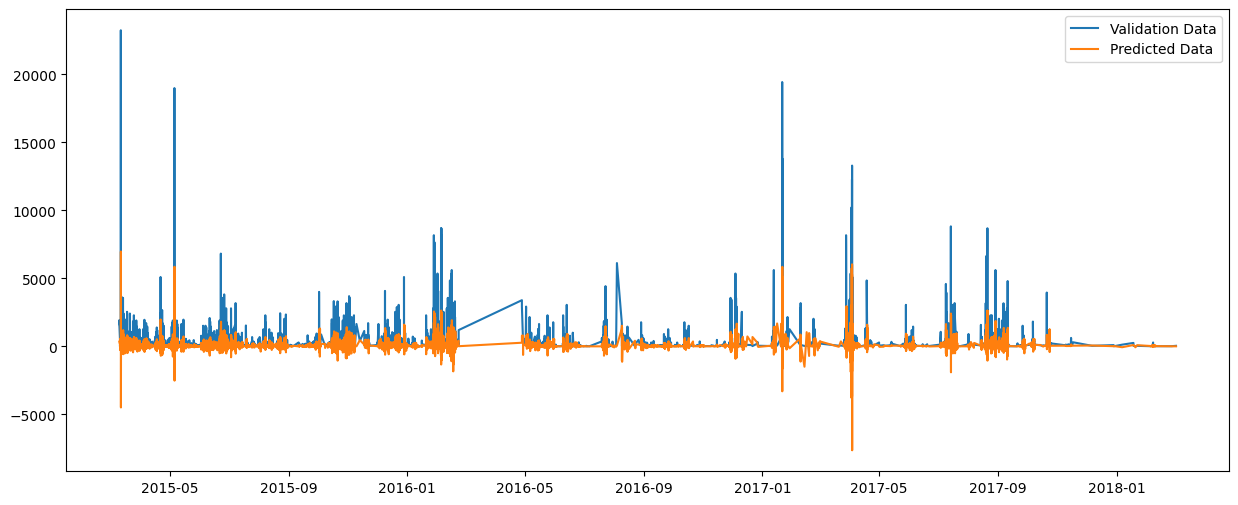

In [122]:
import tensorflow as tf
rnn_forecast = model_forecast(LSTM_model, series[:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]  # rnn_forecast[-328:-1, 0]

# Plots
plt.figure(figsize=(15, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)

# plt.grid(visible=True, axis='both',)
plt.title("")
plt.legend(["Validation Data", "Predicted Data"])
plt.show()

801/801 [==============================] - 11s 13ms/step


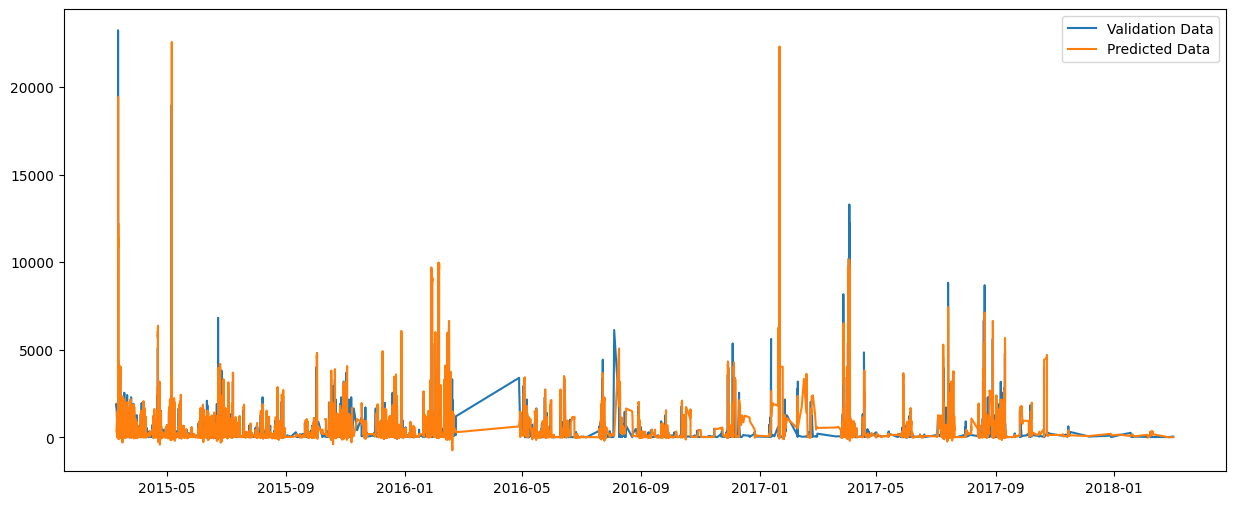

In [123]:

import tensorflow as tf
rnn_forecast = model_forecast(GRU_model, series[:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]  # rnn_forecast[-328:-1, 0]

# Plots
plt.figure(figsize=(15, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)

# plt.grid(visible=True, axis='both',)
plt.title("")
plt.legend(["Validation Data", "Predicted Data"])
plt.show()
